<a href="https://colab.research.google.com/github/TobiasSunderdiek/cartoon-gan/blob/master/CartoonGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN

This notebook contains the implementation of the cartoon GAN model. It is implemented with PyTorch. See README [here](https://github.com/TobiasSunderdiek/cartoon-gan/blob/master/README.md) for more details.

## Generate dataset

## Transfer data via google drive
- all image data in this notebook is expected to be zipped to files on local computer as described in README of this project [here](https://github.com/TobiasSunderdiek/cartoon-gan/blob/master/README.md)
- create folder `cartoonGAN` in `My Drive` in google drive
- copy .zip-files `coco.zip`, `safebooru.zip` and `safebooru_smoothed.zip` to google drive `My Drive`/`cartoonGAN`
- mount google drive in this notebook by executing cell below

In [1]:
from google.colab import drive
drive.mount('/content/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/data


### cartoons images

- cartoon images are located in file `content/data/My Drive/cartoonGAN/safebooru.zip` of this notebook
- extract images and place in folder `cartoons` by executing cell below

In [2]:
!mkdir cartoons
!mkdir cartoons/1
!unzip /content/data/My\ Drive/cartoonGAN/safebooru.zip -d cartoons/1/ #extract to subfolder due to DataLoader needs subdirectories

Archive:  /content/data/My Drive/cartoonGAN/safebooru.zip
  inflating: cartoons/1/sample_bef5424f68e9a2b57960f5098cf7b11c2db60c09.jpg  
  inflating: cartoons/1/sample_909eed31bbc9066eb46f5f38c2c8fff712758752.jpg  
  inflating: cartoons/1/sample_137521e3cffd098f53d952e6cc069af9a11c1845.jpg  
  inflating: cartoons/1/sample_24355b1d263da235bb119baf0360f455001cdf78.jpg  
  inflating: cartoons/1/sample_3370f52df36a94223248f3be53aea8527126db34.jpg  
  inflating: cartoons/1/sample_bd6a13be2493368542c7264ba20b85ffeaabc5c7.jpg  
  inflating: cartoons/1/sample_90e7e20d5c13bd39096e481f35c0508b7aa392e9.jpg  
  inflating: cartoons/1/b244ab04c37d927f77935e7ffa6f2316849a7340.jpg  
  inflating: cartoons/1/73fdab9ee3229039a5bd3c3cb8cc0cc9024cf0b6.jpg  
  inflating: cartoons/1/sample_d9a6995e9ac6db3dda16e84e67e9bbf7d5c67995.jpg  
  inflating: cartoons/1/sample_6189152a3896b83e0a0593db4d68c164cb4b524c.jpg  
  inflating: cartoons/1/83e9b924aca0772da55ca6895b101b699fd126fa.jpg  
  inflating: cartoons/1/sam

##### data-loader

As mentioned in the paper, the used image size is 256x256 pixel.

In [0]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

image_size = 256
batch_size = 25

transformer = transforms.Compose([
    transforms.CenterCrop(image_size),
    transforms.ToTensor()
])

cartoon_image_dataloader = DataLoader(ImageFolder('cartoons/', transformer), batch_size, shuffle=True, num_workers=0)

#### show examples

torch.Size([3, 256, 256])
Current range: 0.3529411852359772 to 1.0


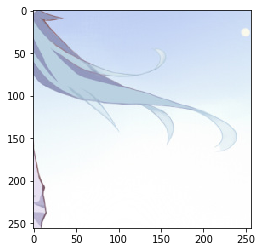

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_image(dataloader):
  iterator = iter(dataloader)
  sample_batch, _ = iterator.next()
  first_sample_image_of_batch = sample_batch[0]
  print(first_sample_image_of_batch.size())
  print("Current range: {} to {}".format(first_sample_image_of_batch.min(), first_sample_image_of_batch.max()))
  plt.imshow(np.transpose(first_sample_image_of_batch.numpy(), (1, 2, 0)))

show_sample_image(cartoon_image_dataloader)

### edge-smoothed cartoons images

- edge-smoothed cartoon images are located in file `content/data/My Drive/cartoonGAN/safebooru_smoothed.zip` of this notebook
- extract images and place in folder `cartoons_smoothed` by executing cell below

In [5]:
!mkdir cartoons_smoothed
!mkdir cartoons_smoothed/1
!unzip /content/data/My\ Drive/cartoonGAN/safebooru_smoothed.zip -d cartoons_smoothed/1/ #extract to subfolder due to DataLoader needs subdirectories

Archive:  /content/data/My Drive/cartoonGAN/safebooru_smoothed.zip
  inflating: cartoons_smoothed/1/sample_bef5424f68e9a2b57960f5098cf7b11c2db60c09.jpg  
  inflating: cartoons_smoothed/1/sample_909eed31bbc9066eb46f5f38c2c8fff712758752.jpg  
  inflating: cartoons_smoothed/1/sample_137521e3cffd098f53d952e6cc069af9a11c1845.jpg  
  inflating: cartoons_smoothed/1/sample_24355b1d263da235bb119baf0360f455001cdf78.jpg  
  inflating: cartoons_smoothed/1/sample_3370f52df36a94223248f3be53aea8527126db34.jpg  
  inflating: cartoons_smoothed/1/sample_bd6a13be2493368542c7264ba20b85ffeaabc5c7.jpg  
  inflating: cartoons_smoothed/1/sample_90e7e20d5c13bd39096e481f35c0508b7aa392e9.jpg  
  inflating: cartoons_smoothed/1/b244ab04c37d927f77935e7ffa6f2316849a7340.jpg  
  inflating: cartoons_smoothed/1/73fdab9ee3229039a5bd3c3cb8cc0cc9024cf0b6.jpg  
  inflating: cartoons_smoothed/1/sample_d9a6995e9ac6db3dda16e84e67e9bbf7d5c67995.jpg  
  inflating: cartoons_smoothed/1/sample_6189152a3896b83e0a0593db4d68c164cb4b5

##### data-loader

same configuration as cartoon data loader above

In [0]:
smoothed_cartoon_image_dataloader = DataLoader(ImageFolder('cartoons_smoothed/', transformer), batch_size, shuffle=True, num_workers=0)

#### show examples

torch.Size([3, 256, 256])
Current range: 0.0 to 1.0


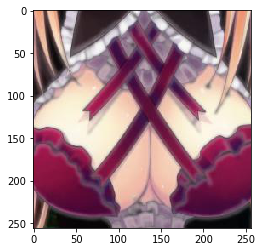

In [7]:
show_sample_image(smoothed_cartoon_image_dataloader)

### photos

- photos are located in file `content/data/My Drive/cartoonGAN/coco.zip` of this notebook
- extract images and place in folder `photos` by executing cell below

In [8]:
!mkdir photos
!mkdir photos/1
!unzip /content/data/My\ Drive/cartoonGAN/coco.zip -d photos/1 #extract to subfolder due to DataLoader needs subdirectories

Archive:  /content/data/My Drive/cartoonGAN/coco.zip
  inflating: photos/1/000000182611.jpg  
  inflating: photos/1/000000278705.jpg  
  inflating: photos/1/000000568981.jpg  
  inflating: photos/1/000000092416.jpg  
  inflating: photos/1/000000173830.jpg  
  inflating: photos/1/000000476215.jpg  
  inflating: photos/1/000000479126.jpg  
  inflating: photos/1/000000231339.jpg  
  inflating: photos/1/000000011051.jpg  
  inflating: photos/1/000000124798.jpg  
  inflating: photos/1/000000272566.jpg  
  inflating: photos/1/000000289059.jpg  
  inflating: photos/1/000000559547.jpg  
  inflating: photos/1/000000295316.jpg  
  inflating: photos/1/000000377393.jpg  
  inflating: photos/1/000000032887.jpg  
  inflating: photos/1/000000111086.jpg  
  inflating: photos/1/000000364884.jpg  
  inflating: photos/1/000000101068.jpg  
  inflating: photos/1/000000361730.jpg  
  inflating: photos/1/000000434230.jpg  
  inflating: photos/1/000000304180.jpg  
  inflating: photos/1/000000567640.jpg  
  in

##### data-loader
same configuration as cartoon data loader above

In [0]:
photo_dataloader = DataLoader(ImageFolder('photos/', transformer), batch_size, shuffle=True, num_workers=0)

#### show examples

torch.Size([3, 256, 256])
Current range: 0.0 to 1.0


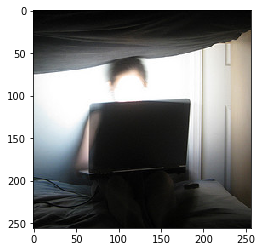

In [10]:
show_sample_image(photo_dataloader)

##Define model

The information about the model structure is given in the paper.

For the `zero padding` of the convolutional layers, I use the following formula:

$$Height x Width_{output} = \frac{HeightxWidth_{input} - kernel size + 2 padding}{stride} + 1$$

e.g:

- `conv_1` layer of generator: $HxW$ should stay the same as input size, which is 256x256 and `stride = 1`

$$256 = \frac{256-7+2padding}{1}+1$$

$$padding = 3$$

In case of a fraction as a result, I choose to ceil:

- `conv_2` layer of generator: $\frac{H}{2} x \frac{W}{2}$ is output with `stride=2`

$$128 = \frac{256-3+2padding}{2}+1$$

$$padding= \frac{1}{2} \Rightarrow padding=1$$

###Generator

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
  def __init__(self):
    super(ResidualBlock, self).__init__()
    self.conv_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.conv_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.norm_1 = nn.BatchNorm2d(256)
    self.norm_2 = nn.BatchNorm2d(256)

  def forward(self, x):
    output = self.norm_2(self.conv_2(F.relu(self.norm_1(self.conv_1(x)))))
    return output + x #ES

class Generator(nn.Module):
    def __init__(self):
      super(Generator, self).__init__()
      self.conv_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=1, padding=3)
      self.norm_1 = nn.BatchNorm2d(64)
      
      # down-convolution #
      self.conv_2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1)
      self.conv_3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
      self.norm_2 = nn.BatchNorm2d(128)
      
      self.conv_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1)
      self.conv_5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
      self.norm_3 = nn.BatchNorm2d(256)
      
      # residual blocks #
      residualBlocks = []
      for l in range(8):
        residualBlocks.append(ResidualBlock())
      self.res = nn.Sequential(*residualBlocks)
      
      # up-convolution #
      self.conv_6 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=0.5, padding=2)
      self.conv_7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
      self.norm_4 = nn.BatchNorm2d(128)

      self.conv_8 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=0.5, padding=2) #padding=1.25, floor or ceil?
      self.conv_9 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
      self.norm_5 = nn.BatchNorm2d(64)
      
      self.conv_10 = nn.Conv2d(in_channels=64, out_channels=3, kernel_size=7, stride=1, padding=3)

    def forward(self, x):
      x = F.relu(self.norm_1(self.conv_1(x)))
      
      x = F.relu(self.norm_2(self.conv_3(self.conv_2(x))))
      x = F.relu(self.norm_3(self.conv_5(self.conv_4(x))))
      
      x = self.res(x)
      
      x = F.relu(self.norm_4(self.conv_7(self.conv_6(x))))
      x = F.relu(self.norm_5(self.conv_9(self.conv_8(x))))
      
      x = self.conv_10(x)

      return x

In [51]:
G = Generator()
print(G)

Generator(
  (conv_1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (res): Sequential(
    (0): ResidualBlock(
      (conv_1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm_1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

### Discriminator

In [0]:
class Discriminator(nn.Module):
  def __init__(self):
     super(Discriminator, self).__init__()
     self.conv_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
      
     self.conv_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1)
     self.conv_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
     self.norm_1 = nn.BatchNorm2d(128)
      
     self.conv_4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1)
     self.conv_5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
     self.norm_2 = nn.BatchNorm2d(256)
    
     self.conv_6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
     self.norm_3 = nn.BatchNorm2d(256)
    
     self.conv_7 = nn.Conv2d(in_channels=256, out_channels=1, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    x = F.leaky_relu(self.conv_1(x))
    
    x = F.leaky_relu(self.norm_1(self.conv_3(F.leaky_relu(self.conv_2(x)))), negative_slope=0.2)
    
    x = F.leaky_relu(self.norm_2(self.conv_5(F.leaky_relu(self.conv_4(x)))), negative_slope=0.2)
    
    x = F.leaky_relu(self.norm_3(self.conv_6(x)), negative_slope=0.2)
    
    x = self.conv_7(x)
    
    return x

In [53]:
D = Discriminator()
print(D)

Discriminator(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_7): Conv2d(256, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


### move to GPU

In [54]:
import torch

if torch.cuda.is_available():
  G.cuda()
  D.cuda()
  print("Train on GPU. Models moved.")
else:
  print("No cuda available")

No cuda available


## Loss function
$\mathcal{L}(G, D) = \mathcal{L}_{adv}(G, D) + ω\mathcal{L}_{con}(G, D)$ with ω = 10

This loss is used to train the discriminator and the generator. In the adversarial part, the discriminator tries to classify the generated images as fakes.

During the generator training, the generator tries to minimize the classifications, where the discriminator classifies the generated image as fake. The generator has only affect on the parts of the formula where $G()$ is involved, so the generator tries to minimize this part. Additionally, the loss is not directly calculated from the generator output, but from the discriminator output. Due to the fact that the generator output is the input for the discriminator output in the generator training, the generator is in the chain of the backpropagation, when the loss from the discriminator output is backprogagated all the way back through the discriminator model and generator model to the photo image input data [1], [2].

[1] https://developers.google.com/machine-learning/gan/generator

[2] https://towardsdatascience.com/only-numpy-implementing-gan-general-adversarial-networks-and-adam-optimizer-using-numpy-with-2a7e4e032021

### Adversarial loss

The adversarial loss  $\mathcal{L}_{adv}(G, D)$ which drives the generator to transform photo to comic style of the image. Its value indicates if the output looks like a cartoon image or not. The paper highlights, that a characteristic part of cartoons images are the clear edges, which are a small detail of the image, must be preserved to generate clear edges in the result. In the paper, this is solved by training not only with cartoon images but additionaly by training with the same cartoon images with smoothed edges so that the discriminator can distinguish between clear and smooth edges. For achieving this the authors define the edge-promoting adversarial loss function:

$\mathcal{L}_{adv}(G, D) = \mathbb{E}_{ci∼S_{data}(c)}[log D(c_i)]
+ \mathbb{E}_{ej∼S_{data}(e)}[log(1 − D(e_j))]
+ \mathbb{E}_{pk∼S_{data}(p)}[log(1 − D(G(p_k)))]$

- for the discriminator, this is the formula for the loss function, because output of the Discriminator plays no role within the content loss part of the loss function.

- for the initialization phase of the generator, this part of the formula is not used as described in the paper.

- for the training phase of the generator, only the part of the formula is used within the generator loss function, which the generator can affect: $\mathbb{E}_{pk∼S_{data}(p)}[log(1 − D(G(p_k)))]$

### Content loss
The content loss $ω\mathcal{L}_{con}(G, D)$ which preserves the semantic content during transformation. To calculate this, in the paper the high-level feature maps of the VGG network is used, in particular the layer ($l$) `conv4_4`. The output of the layer $l$ for the original photo is subtracted from the output of the layer $l$ of the generated image. The result is regularized using the $\mathcal{L_1}$ spare regularization ($||...||_1$):

$\mathcal{L}_{con}(G, D)= \mathbb{E}_{pi~S_{data}(p)}[||VGG_l(G(p_i))-VGG_l(p_i)||_1]$

This part of the formula plays a role in the loss function for the generator, not for the discriminator, because only the generator is used within this formula.

More info about $\mathcal{L_1}$ regularization:

https://medium.com/mlreview/l1-norm-regularization-and-sparsity-explained-for-dummies-5b0e4be3938a

https://medium.com/@montjoile/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c

In [55]:
from torchvision import models

vgg16 = models.vgg16(pretrained=True)
print(vgg16)

# due VGG16 has 5 pooling-layer, I assume conv4_4 is the 4th pooling layer
# (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
feature_extractor = vgg16.features[:24]
for param in feature_extractor.parameters():
  param.require_grad = False

print(feature_extractor)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Three loss functions

- discriminator loss
- generator initialization phase loss
- generator loss

In [0]:
from torchvision import models

class DiscriminatorLoss(torch.nn.Module):
  def __init__(self):
      super(DiscriminatorLoss, self).__init__()

  def forward(self, discriminator_output_of_cartoon_input,
              discriminator_output_of_cartoon_smoothed_input,
              discriminator_output_of_generated_image_input):

    return _adversarial_loss(discriminator_output_of_cartoon_input,
                     discriminator_output_of_cartoon_smoothed_input,
                     discriminator_output_of_generated_image_input)

  def _adversarial_loss(discriminator_output_of_cartoon_input,
                     discriminator_output_of_cartoon_smoothed_input,
                     discriminator_output_of_generated_image_input):
  
    return log(discriminator_output_of_cartoon_input) +\
         log(1 - discriminator_output_of_cartoon_smoothed_input) +\
         log(1 - discriminator_output_of_generated_image_input)

In [0]:
class GeneratorInitPhaseLoss(torch.nn.Module):
  def __init__(self):
      super(GeneratorInitPhaseLoss, self).__init__()
      vgg16 = models.vgg16(pretrained=True)
      self.feature_extractor = vgg16.features[:24]
      for param in self.feature_extractor.parameters():
        param.require_grad = False

  def forward(self, generator_input, generator_output):
    return _content_loss(generator_input, generator_output)

  def _content_loss(generator_input, generator_output):
    return (self.feature_extractor(generator_output) - self.feature_extractor(generator_input)).norm(p=1)

In [0]:
class GeneratorLoss(torch.nn.Module):
  def __init__(self):
      super(GeneratorLoss, self).__init__()
      self.w = 10
      vgg16 = models.vgg16(pretrained=True)
      self.feature_extractor = vgg16.features[:24]
      for param in self.feature_extractor.parameters():
        param.require_grad = False

  def forward(self, discriminator_output_of_generated_image_input,
              generator_input,
              generator_output):
    return _adversarial_loss_generator_part_only(discriminator_output_of_generated_image_input) +\
        self.w * _content_loss(generator_input, generator_output)

  def _adversarial_loss_generator_part_only(discriminator_output_of_generated_image_input):
    return log(discriminator_output_of_generated_image_input)

  def _content_loss(generator_input, generator_output):
    return (self.feature_extractor(generator_output) - self.feature_extractor(generator_input)).norm(p=1)

In [0]:
discriminatorLoss = DiscriminatorLoss()
generatorInitPhaseLoss = GeneratorInitPhaseLoss()
generatorLoss = GeneratorLoss()

### Optimizer
In the paper, the used optimizer is not mentioned, I decide to choose adam.

For hyperparameter-tuning, I decided to go with the same parameters mentioned in the DCGAN-paper[1].

[1] https://arxiv.org/pdf/1511.06434.pdf

In [0]:
import torch.optim as optim

lr = 0.0002
beta1 = 0.5
beta2 = 0.999

d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

### Training

- TODO: init phase
- TODO: save some results during training

In [0]:
def train(_num_epochs):
  print_every = 10
  losses = []

  for epoch in range(_num_epochs):
    for batch_index, ((photo_images, _), (smoothed_cartoon_images, _), (cartoon_images, _)) in enumerate(zip(photo_dataloader, smoothed_cartoon_image_dataloader, cartoon_image_dataloader)):
      batch_size = photo_images.size(0)
      if torch.cuda.is_available():
        photo_images = photo_images.cuda()
        smoothed_cartoon_images = smoothed_cartoon_images.cuda()
        cartoon_images = cartoon_images.cuda()

      # train the discriminator
      d_optimizer.zero_grad()
      
      discriminator_output_of_cartoon_input = D(cartoon_images)
      discriminator_output_of_cartoon_smoothed_input = D(smoothed_cartoon_images)
      discriminator_output_of_generated_image_input = D(G(photo_images))

      d_loss = discriminatorLoss(discriminator_output_of_cartoon_input,
                            discriminator_output_of_cartoon_smoothed_input,
                            discriminator_output_of_generated_image_input)
      
      d_loss.backward()
      d_optimizer.step()

      # train the generator
      g_optimizer.zero_grad()

      #### TODO same var as above, is this a problem within training?
      discriminator_output_of_generated_image_input = D(G(photo_images))
      g_loss = generatorLoss(discriminator_output_of_generated_image_input)

      g_loss.backward()
      g_optimizer.step()


      if batch_index % print_every == 0:
        losses.append(d_loss.item(), g_loss.item())
        print("Epoch {}/{} | d_loss {:6.4f} | g_loss {:6.4f}".format(epoch, _num_epochs, d_loss.item(), g_loss.item()))

In [0]:
num_epochs = 1

train(num_epochs)

## Notes/next steps
- alternative lib for image processing: https://github.com/albu/albumentations
- figure out which variant of VGG to use (VGG-16?), and if the pre-training in the referenced paper is the same as the pre-trained pytorch version
- do I use the correct `log` in adversarial loss?
- do I use correct normalization-method in content loss
- hyperparameter tuning with tune
- in which order is the discriminator trained regarding photos, cartoons with smoothed edges and then genereated images?
- evaluate result with existing model http://cg.cs.tsinghua.edu.cn/people/~Yongjin/CartoonGAN-Models.rar ?
- use NLLLoss or something different for loss function instead of log(...) like in the udacity examples?
- did I split the loss function correctly for the D and G model, and content loss only for G?
- plot results directly from vars via method